# Erin Swan-Siegel Data Science Capstone Project
## CLEANING AND EDA

Created on Saturday November 4th, 2023

In [120]:
# Import necessary libraries 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Read in csv
df = pd.read_csv(r"C:\Users\erins\OneDrive\Desktop\MS_Data_analytics\44-688\Capstone_Project\scraping-glassdoor-selenium\Company_Rating_Data.csv", encoding='latin-1')

# Pre-processing field correlation
df.corr()

C:\Users\erins\AppData\Local\Temp\ipykernel_8908\2838899987.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Company Rating,Year Founded
Company Rating,1.000000,0.489619
Year Founded,0.489619,1.000000


In [121]:
# Drop undesired fields
df = df.drop(['Number of Reviews','Average Salary','Job Openings','Location Website', 'Company Webpage', 'Global Size 2', 'Company Location', 'Industry 2', 'Headquarters','Industry'], axis=1)

In [122]:
# Check for and remove records with default values ('Unknown', -1)
df = df[df['Global Size'] != -1] # 883 additional
df = df[df['Global Size'] != 'Unknown']
df = df[df['Company Rating'] != -1] # 144 additional
df = df[df['Company Ownership Type'] != 'Unknown'] # 27 additional/
df = df[df['Company Ownership Type'] != -1] # 27 additional
df = df[df['Year Founded'] != -1] # 1,053 additional
df = df[df['Est Yearly Revenue'] != 'Unknown / Non-Applicable'] # 1,430 additional
df = df[df['Est Yearly Revenue'] != -1] # 1,430 additional

In [123]:
# Print count of records in each field
df.count()

Company Name              3829
Global Size               3829
Description               3829
Company Rating            3829
Company Ownership Type    3829
Year Founded              3829
Est Yearly Revenue        3829
dtype: int64

In [131]:
# Define a new data frame for Data Exploration Task
df_col = df[['Company Rating','Global Size','Est Yearly Revenue','Company Ownership Type']]

In [125]:
# Replace values in non-numeric fields with numbers for further Data Exploration tasks

# Replace all instances of <value> with <number> in column: 'Global Size'
df['Global Size'] = df['Global Size'].str.replace("1 to 50 Employees", "1", case=False, regex=False)
df['Global Size'] = df['Global Size'].str.replace("51 to 200 employees", "2", case=False, regex=False)
df['Global Size'] = df['Global Size'].str.replace("201 to 500 Employees", "3", case=False, regex=False)
df['Global Size'] = df['Global Size'].str.replace("501 to 1000 employees", "4", case=False, regex=False)
df['Global Size'] = df['Global Size'].str.replace("1001 to 5000 employees", "5", case=False, regex=False)
df['Global Size'] = df['Global Size'].str.replace("5001 to 10000 employees", "6", case=False, regex=False)
df['Global Size'] = df['Global Size'].str.replace("10000+ employees", "7", case=False, regex=False)
# Replace all instances of <value> with <number> in column: 'Company Ownership Type'
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("College / University", "1", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Company - Private", "2", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Company - Public", "3", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Contract", "4", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Franchise", "5", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Government", "6", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Hospital", "7", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Nonprofit Organization", "8", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Other Organization", "9", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Private Practice / Firm", "10", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("School / School District", "11", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Self-employed", "12", case=False, regex=False)
df['Company Ownership Type'] = df['Company Ownership Type'].str.replace("Subsidiary or Business Segment", "13", case=False, regex=False)
# Replace all instances of <value> with <number> in column: 'Est Yearly Revenue'
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("Less than $1 million (USD)", "1", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$1 to $5 million (USD)", "2", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$5 to $10 million (USD)", "3", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$10 to $25 million (USD)", "4", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$25 to $50 million (USD)", "5", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$50 to $100 million (USD)", "6", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$100 to $500 million (USD)", "7", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$500 million to $1 billion (USD)", "8", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$1 to $2 billion (USD)", "9", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$2 to $5 billion (USD)", "10", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$5 to $10 billion (USD)", "11", case=False, regex=False)
df['Est Yearly Revenue'] = df['Est Yearly Revenue'].str.replace("$10+ billion (USD)", "12", case=False, regex=False)

In [126]:
# Convert number values stored as string to numeric for data exploration activities
df['Global Size'] = pd.to_numeric(df['Global Size'])
df['Company Ownership Type'] = pd.to_numeric(df['Company Ownership Type'])
df['Est Yearly Revenue'] = pd.to_numeric(df['Est Yearly Revenue'])

In [127]:
# Calculate the Age of a company by subtracting the Founded in Year from the current year
df['Year Founded'] = 2023 - df['Year Founded']

# Rename the newly calculated field
df.rename(columns={"Year Founded": "Company Age"}, inplace=True)

In [128]:
# Confirm values have been updated to numeric
print(df['Global Size'].unique())
print(df['Company Ownership Type'].unique())
print(df['Est Yearly Revenue'].unique())
print(df['Company Age'].unique())

[7 4 3 5 2 6 1]
[ 2  3  8 13  1 12  7  4  9  6 10 11  5]
[12 10  3  7  5  6  9 11  4  8  2  1]
[173 171 112 139  19 126  16 160 165 108  14  13  23  86 130  27  61  18
 117  15 127 211 159  51  31  52  25 184 224 333  29  24 152  17 161  37
  11 143 172  33  26  21  54  34  39 167  38  66 158  40  28  44 187 148
  55  20 135 101  22 107 205  56 104  45  62   6  75   7  57  41  10 182
  91 116  12   4  30   8  46 111   3  78  94  47  43  73 110 109  84 129
  92   9  70  59 115   5  88  68  53 134  50  65 118  64  72  35 155  36
 121  32  96 157 141  49  58 206  77  95  89 249  42 133 170 122 131 137
 195 166  74  48 154  80 136  63  67  60 138  71 100  97 168 181  69 124
 178 239 177 231 199 191 102 248  82 149  83  76 153  99 190  90 125  98
 128 183  87 120  85  79 176  81 114 216 123 119 103 140 144 186 156 242
 113 169 162 145 105 132 174 106 147 146 164 142 325 180 151 193 341 238
  93 202 163 212 227 229 317 355 236 257 175 217 192]


# Data Exploration

In [132]:
# Display new field correlation
df[['Company Rating','Global Size','Est Yearly Revenue','Company Ownership Type','Company Age']].corr()

,Company Rating,Global Size,Est Yearly Revenue,Company Ownership Type,Company Age
Company Rating,1.000000,-0.261028,-0.231441,-0.141168,-0.119914
Global Size,-0.261028,1.000000,0.840805,0.179708,0.466078
Est Yearly Revenue,-0.231441,0.840805,1.000000,0.144819,0.443217
Company Ownership Type,-0.141168,0.179708,0.144819,1.000000,0.164166
Company Age,-0.119914,0.466078,0.443217,0.164166,1.000000


Visualization for Company Rating: Total = 36


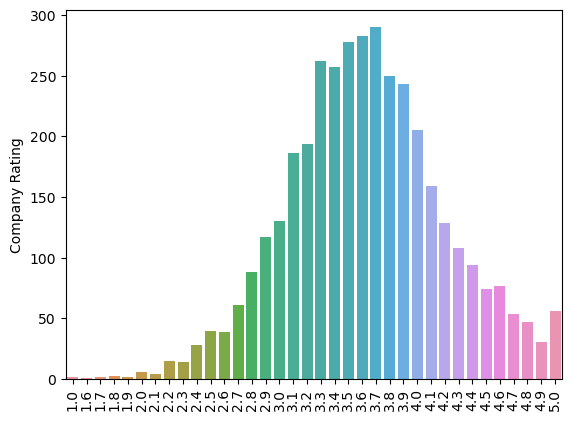

Visualization for Global Size: Total = 7


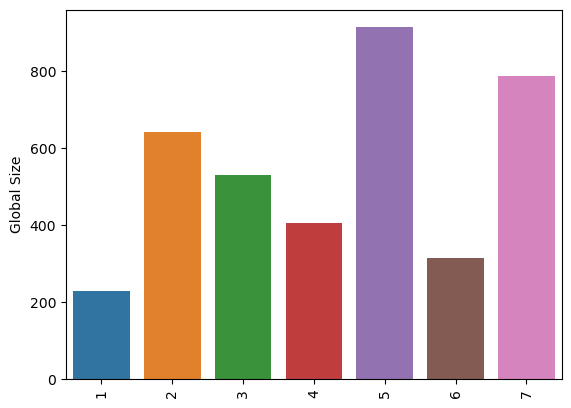

Visualization for Est Yearly Revenue: Total = 12


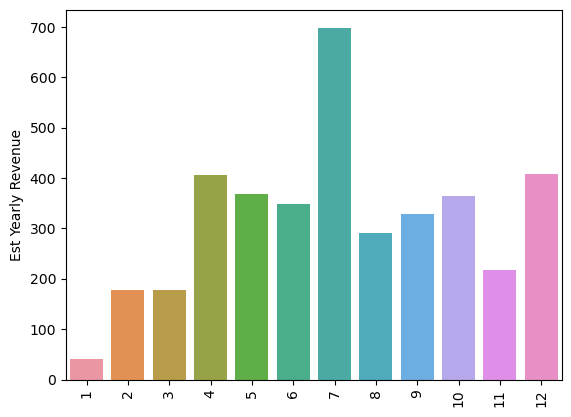

Visualization for Company Ownership Type: Total = 13


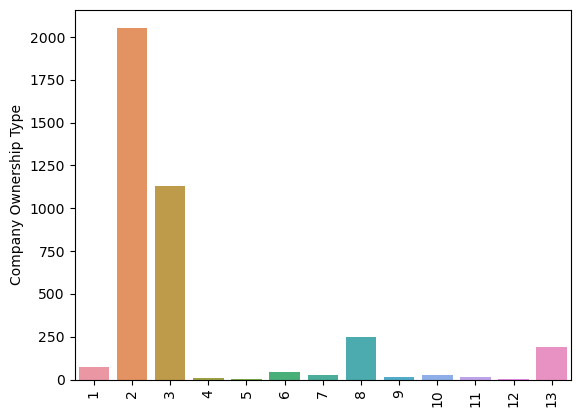

In [133]:
# NEED TO FIGURE OUT HOW TO LOCK df_col IN
# Charts of column values and counts
for i in df_col.columns:
    col_num = df_col[i].value_counts()
    #df_col.sort_values([i])
    print("Visualization for %s: Total = %d" % (i, len(col_num)))
    #print(col_num)
    chart = sns.barplot(x=col_num.index, y=col_num, data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

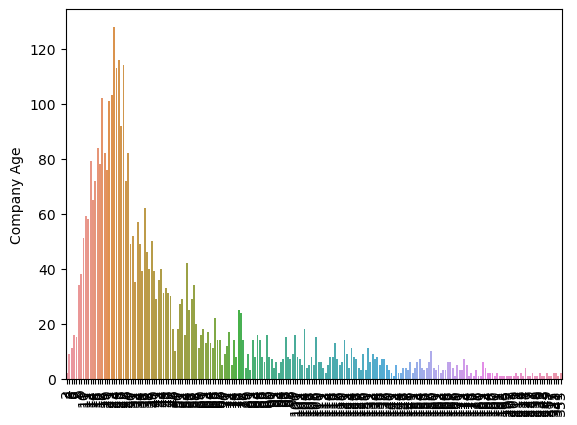

In [136]:
# chart of Company Age
col_num = df['Company Age'].value_counts()
chart = sns.barplot(x=col_num.index, y=col_num, data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [103]:
# Describe Data 
df.describe()

,Global Size,Company Rating,Company Ownership Type,Company Age,Est Yearly Revenue
count,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000
mean,4.366414,3.630008,3.410290,48.421781,7.209976
std,1.907947,0.574839,2.812424,44.024572,2.921615
min,1.000000,1.000000,1.000000,3.000000,1.000000
25%,3.000000,3.300000,2.000000,21.000000,5.000000
50%,5.000000,3.600000,2.000000,31.000000,7.000000
75%,6.000000,4.000000,3.000000,59.000000,10.000000
max,7.000000,5.000000,13.000000,355.000000,12.000000


In [ ]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['Company Rating','Global Size','Est Yearly Revenue','Company Ownership Type','Company Age']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.boxplot(column = 'Company Age')

In [ ]:
df.boxplot(column = 'Company Rating')